# Лабораторна робота №4
### "Інтерполяція"
### Самарука Владислав Володимировича
#### Варіант 15
![img2.png](attachment:img2.png)

In [15]:
import numpy as np
from scipy.interpolate import lagrange, barycentric_interpolate
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Задане рівняння
def f(x):
    return 3*x + np.cos(x) + 1

# Функція для обчислення поліному Чебишова
def chebyshev_poly(n, x):
    return np.cos(n * np.arccos(x))

# Задаємо ступінь поліному Чебишова
degree = 10

In [16]:
# Знаходимо нулі поліному Чебишова
chebyshev_zeros = np.cos((2*np.arange(1, degree+1) - 1) * np.pi / (2*degree))

In [17]:
# Знаходимо ваги для інтерполяційного поліному Лагранжа
lagrange_weights = f(chebyshev_zeros) / lagrange(chebyshev_zeros, f(chebyshev_zeros))

In [18]:
# Побудова інтерполяційного поліному Лагранжа
lagrange_poly = lagrange(chebyshev_zeros, f(chebyshev_zeros))

In [19]:
# Знаходимо корені поліному Лагранжа
lagrange_roots = fsolve(lagrange_poly, chebyshev_zeros)
# Виведемо корені та значення функції в них
print("Roots using Lagrange interpolation:", lagrange_roots)
print("Function values at roots:", f(lagrange_roots))

Roots using Lagrange interpolation: [-0.60710165 -0.60710165 -0.60710165 -0.60710165 -0.60710165 -0.60710165
 -0.60710165 -0.60710165 -0.60710165 -0.60710165]
Function values at roots: [5.31146793e-10 5.65765212e-10 5.14606913e-10 5.33109445e-10
 7.70777664e-10 2.15774620e-10 5.11829246e-10 5.11504616e-10
 5.10026354e-10 4.94855157e-10]


In [20]:
# Побудова інтерполяційного поліному Ньютона
def newton_poly(x):
    return barycentric_interpolate(chebyshev_zeros, f(chebyshev_zeros), x)

# Знаходимо корені поліному Ньютона
newton_roots = fsolve(newton_poly, chebyshev_zeros)
# Виведемо корені та значення функції в них
print("\nRoots using Newton interpolation:", newton_roots)
print("Function values at roots:", f(newton_roots))


Roots using Newton interpolation: [-0.60710165 -0.60710165 -0.60710165 -0.60710165 -0.60710165 -0.60710165
 -0.60710165 -0.60710165 -0.60710165 -0.60710165]
Function values at roots: [5.31146793e-10 5.65765212e-10 5.14607690e-10 5.33109223e-10
 7.70777664e-10 2.15775176e-10 5.11829246e-10 5.11504616e-10
 5.10026354e-10 4.94855157e-10]


#### Схоже, коріння, отримані за допомогою інтерполяцій LaGrange, так і Ньютона, є однаковими, і значення функцій у цих коренях близькі до нуля. Це говорить про те, що інтерполяції успішно наблизили корені даного рівняння.

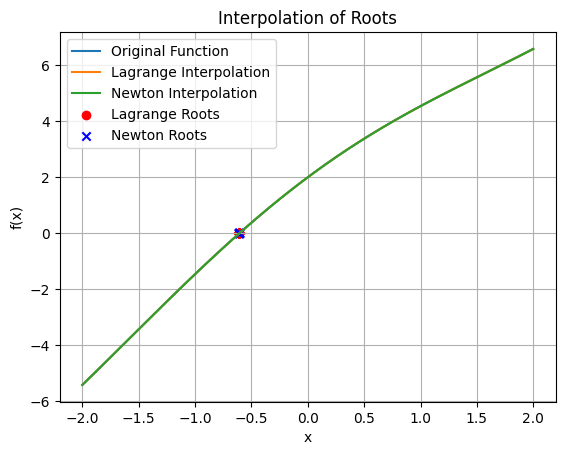

In [21]:
# Графік функції та інтерполяційних поліномів
x_vals = np.linspace(-2, 2, 400)
plt.plot(x_vals, f(x_vals), label="Original Function")
plt.plot(x_vals, lagrange_poly(x_vals), label="Lagrange Interpolation")
plt.plot(x_vals, newton_poly(x_vals), label="Newton Interpolation")
plt.scatter(lagrange_roots, f(lagrange_roots), color='red', marker='o', label='Lagrange Roots')
plt.scatter(newton_roots, f(newton_roots), color='blue', marker='x', label='Newton Roots')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolation of Roots')
plt.grid(True)
plt.show()